In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

(array([3., 0., 0., 1., 1., 3., 1., 0., 3., 2., 2., 3., 1., 1., 4., 3., 1.,
        2., 3., 1., 0., 5., 5., 2., 4., 7., 4., 3., 5., 2., 3., 1., 1., 1.,
        2., 3., 2., 1., 3., 2., 2., 3., 2., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.3371  , 0.337718, 0.338336, 0.338954, 0.339572, 0.34019 ,
        0.340808, 0.341426, 0.342044, 0.342662, 0.34328 , 0.343898,
        0.344516, 0.345134, 0.345752, 0.34637 , 0.346988, 0.347606,
        0.348224, 0.348842, 0.34946 , 0.350078, 0.350696, 0.351314,
        0.351932, 0.35255 , 0.353168, 0.353786, 0.354404, 0.355022,
        0.35564 , 0.356258, 0.356876, 0.357494, 0.358112, 0.35873 ,
        0.359348, 0.359966, 0.360584, 0.361202, 0.36182 , 0.362438,
        0.363056, 0.363674, 0.364292, 0.36491 , 0.365528, 0.366146,
        0.366764, 0.367382, 0.368   ]),
 <BarContainer object of 50 artists>)

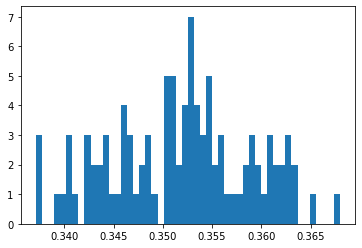

In [17]:
plt.hist(data.messdaten, bins=50)

In [13]:
data = data.sort_values(by=['messdaten'])
data.nunique()



Unnamed: 0    100
serial#       100
messdaten      81
dtype: int64

nimm 1 wert. berechne den nötigen mindest rest durchschnittswert und nimm eine Zeile aus der Resttabelle und füge hinzu. nochmal

In [18]:
def get_bins(X, top=4, corridor=(1.75, 1.8)):
    df = X
    bin_dfs=[]
    bin_neu = []
    #df = df[df["serial#"] != df.iloc[0]["serial#"]]
    tops = 0
    while len(df.messdaten)>0:
            if bin_neu ==[]:
                bin_neu = df[0:1]
                df = df[df["serial#"] != bin_neu.iloc[-1]["serial#"]]#df[0:1]["serial#"]]
            for i in range(4):
                ziel_avg = (corridor[0]-np.sum(bin_neu.messdaten))/(5-len(bin_neu.messdaten))
                bin_neu = pd.concat([bin_neu, df[df.messdaten > ziel_avg].head(1)], axis=0)
                df = df[df["serial#"] != bin_neu.iloc[-1]["serial#"]]
            bin_dfs.append(bin_neu)
            bin_neu=[]
                #df = df[df["serial#"] != df[df.messdaten > ziel_avg][0:1].iloc[0]["serial#"]]
                #if len(bin_neu.messdaten) >4:
                 #   bin_dfs.append(bin_neu)
                  #  bin_neu=[]'''
            if tops < top:
                if bin_neu ==[]:
                    bin_neu = df.tail(1)
                    df = df[df["serial#"] != bin_neu.iloc[-1]["serial#"]]
                for i in range(4):
                    ziel_avg = (corridor[1]-np.sum(bin_neu.messdaten))/(5-len(bin_neu.messdaten))
                    bin_neu = pd.concat([bin_neu, df[df.messdaten < ziel_avg].tail(1)], axis=0)
                    df = df[df["serial#"] != bin_neu.iloc[-1]["serial#"]]
                bin_dfs.append(bin_neu)
                bin_neu=[]
                tops+=1
                
        
    return bin_dfs

In [19]:
def create_bin_stats(X):
    #set bin ids
    bin_no = []
    no = 1
    for i in range(len(X)//5):
        for j in range(5):
            bin_no.append(no)
        no+=1
    X["bin"] = bin_no
    bin_stats = X.groupby(by="bin").agg({"messdaten":"sum"}).rename(columns = {"messdaten":"bin_sum"})
    bin_stats["bin_dif"] = X.groupby(by="bin").agg({"messdaten":"max"}) - X.groupby(by="bin").agg({"messdaten":"min"})
    X = X.merge(bin_stats, on="bin")
    return X

In [20]:
def create_new_list(bin_list):
    start = bin_list[0]
    for i in bin_list[1:]:
        start=pd.concat([start, i], axis=0)
    cleaned_list = create_bin_stats(start)
    return cleaned_list

In [21]:
result = create_new_list(get_bins(data, top=2, corridor=(1.75, 1.8)))

In [22]:
max(np.array(result.bin_sum)), max(np.array(result.bin_dif))

(1.7999999999999998, 0.017900000000000027)

In [23]:
result["serial#"].nunique()

100

In [24]:
result.to_csv("Ergebnis.csv")

In [11]:
def get_Input_stats(data, tolerance=0.025):
    ''' Diese Funktion nimmt den EIngangsdatensatz und bestimmt den größten und kleinsten
        Wert, den Durchschnittswert und die 5% max_dif (tolerance 2.5%)'''
    lim_upper =
    lim_loweer=
    mean_df
    thresh_5_percent
    pass

,Unnamed: 0,serial#,messdaten,bin,bin_sum,bin_dif
0,#66,31448834,0.3371,1,1.7501,0.0165
1,#36,31448874,0.3536,1,1.7501,0.0165
2,#52,31448908,0.3531,1,1.7501,0.0165
3,#39,31448877,0.3531,1,1.7501,0.0165
4,#85,31448881,0.3532,1,1.7501,0.0165
5,#47,31448903,0.3680,2,1.7999,0.0110
6,#95,31465063,0.3570,2,1.7999,0.0110
7,#84,31448880,0.3583,2,1.7999,0.0110
8,#80,31448867,0.3580,2,1.7999,0.0110
9,#20,31448865,0.3586,2,1.7999,0.0110
